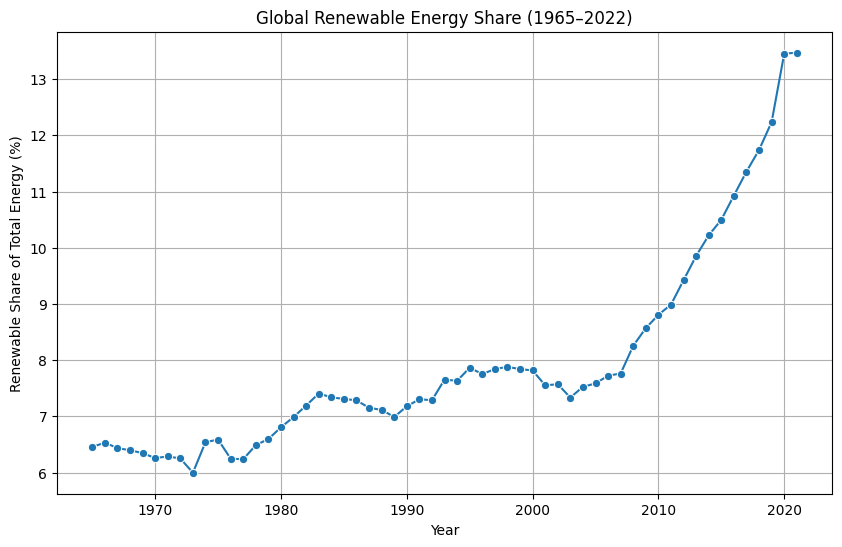

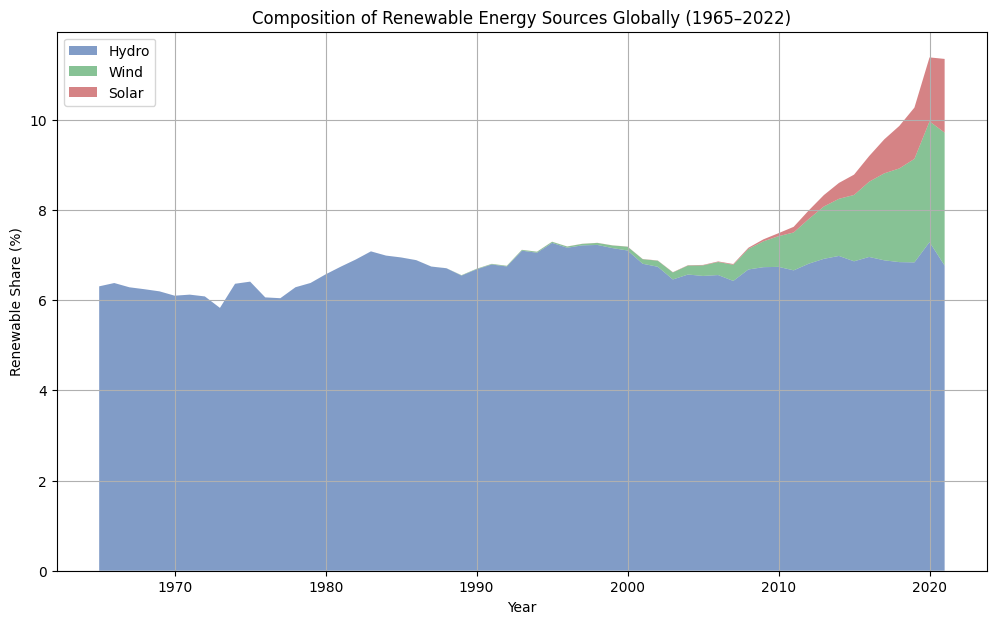

<ipython-input-9-f7616ee192a4>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_data, x='Type', y='Percentage', palette='Set2')


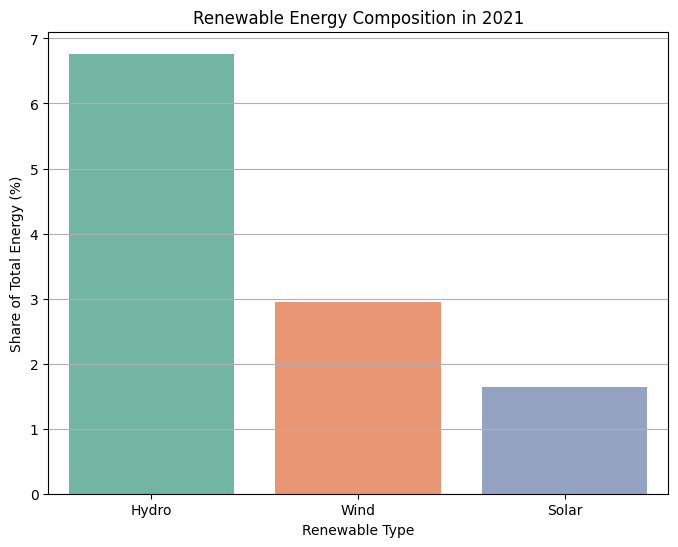

In [9]:
# Day 2: Fossil Fuels vs. Renewables Visualization

# Install and import required libraries
# !pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (elide these in starter, provide paths only)
df_total = pd.read_csv('01 renewable-share-energy.csv')
df_hydro = pd.read_csv('06 hydro-share-energy.csv')
df_wind = pd.read_csv('10 wind-share-energy.csv')
df_solar = pd.read_csv('14 solar-share-energy.csv')

# Filter for 'World' data (elide in starter)
df_total_world = df_total[df_total['Entity'] == 'World']
df_hydro_world = df_hydro[df_hydro['Entity'] == 'World']
df_wind_world = df_wind[df_wind['Entity'] == 'World']
df_solar_world = df_solar[df_solar['Entity'] == 'World']

# Merge datasets into single dataframe for plotting (elide this step)
df_merged = pd.DataFrame({
    'Year': df_total_world['Year'],
    'Total Renewable': df_total_world['Renewables (% equivalent primary energy)'],
    'Hydro': df_hydro_world['Hydro (% equivalent primary energy)'].values,
    'Wind': df_wind_world['Wind (% equivalent primary energy)'].values,
    'Solar': df_solar_world['Solar (% equivalent primary energy)'].values
})

# Plot 1: Line plot showing renewable energy share over time
plt.figure(figsize=(10,6))
sns.lineplot(data=df_merged, x='Year', y='Total Renewable', marker='o')
plt.title('Global Renewable Energy Share (1965–2022)')
plt.ylabel('Renewable Share of Total Energy (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# Plot 2: Stacked area chart for different types of renewable energy
plt.figure(figsize=(12,7))
plt.stackplot(df_merged['Year'],
              df_merged['Hydro'],
              df_merged['Wind'],
              df_merged['Solar'],
              labels=['Hydro', 'Wind', 'Solar'],
              colors=['#4c72b0','#55a868','#c44e52'], alpha=0.7)

plt.title('Composition of Renewable Energy Sources Globally (1965–2022)')
plt.ylabel('Renewable Share (%)')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot 3: Bar chart comparison for latest available year
latest_year = df_merged['Year'].max()
latest_data = df_merged[df_merged['Year'] == latest_year].melt(
    id_vars='Year', value_vars=['Hydro', 'Wind', 'Solar'],
    var_name='Type', value_name='Percentage')

plt.figure(figsize=(8,6))
sns.barplot(data=latest_data, x='Type', y='Percentage', palette='Set2')
plt.title(f'Renewable Energy Composition in {latest_year}')
plt.ylabel('Share of Total Energy (%)')
plt.xlabel('Renewable Type')
plt.grid(axis='y')
plt.show()
